# Advanced Visualization Dataset 

## Downloading & Prepping data

In [1]:
import numpy as np     # usefull for many scientific computing in Python
import pandas as pd    # primary data structure library
from PIL import Image   # converting images into arrays

In [2]:
df_can = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
# Clean up dataset to unnecessary columns
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Lets rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# For sake of consistency, lets also make all column label of type string
df_can.columns = list(map(str, df_can.columns))

# Set the country name as Index - usefull for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column 
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this session - usefull for plotting later on
years = list(map(str, range(1980, 2014)))



print("Data Dimensions : ", df_can.shape)

Data Dimensions :  (195, 38)


C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_16512/3294886499.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


## Visualizing Data using Matplotlib 

In [5]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Needed for waffle chart

mpl.style.use('ggplot') # Optional : for ggplot-like style

# check for latest version of matplotlib
print('Matplotlib Version : ', mpl.__version__)

Matplotlib Version :  3.4.1


### Waffle Charts
adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progres menuju tujuan. waffle chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor excel. *Sayangnya, dalam pustaka visualisasi python tidak ada jadi akan kita buat dari awal.*

In [6]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


#### Step 1
Menentukan proporsi setiap kategori sehubung dengan total-nya

In [7]:
# Compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# Print proportions
for i, proportion in enumerate(category_proportions) :
    print(df_dsn.index.values[i] + '; ' + str(proportion))

Denmark; 0.32255663965602777
Norway; 0.1924094592359848
Sweden; 0.48503390110798744


#### Step 2 
Menentukan ukuran keseluruhan dari waffle chart

In [8]:
width = 40   # Width for chart
height = 10  # Height for chart

total_num_tiles = width * height  # Total number of tiles

total_num_tiles

400

#### Step 3
Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing masing kategori

In [9]:
# Compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# Print out
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


#### Step 4
Membuat matriks yang menyerupai waffle dan mengisi-nya

In [18]:
# Initialize the waffle chart as an empty matriks
waffle_chart = np.zeros((height, width))

# Define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        
#         if the number of tiles populated for the current category is equal to its corresponding allocated tiles....
        if tile_index > sum(tiles_per_category[0:category_index]):
#             .... proceed to the next category
            category_index += 1
    
#         set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
   

waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

####  Step 5
Petakan matriks waffle chart menjadi visual

<Figure size 432x288 with 0 Axes>

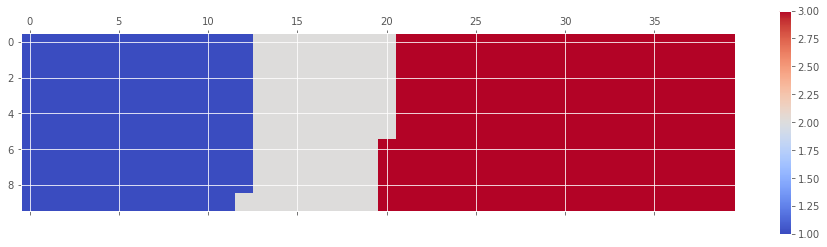

In [19]:
# Instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

#### Step 6
Percantik tampilan waffle chart

([], [])

<Figure size 432x288 with 0 Axes>

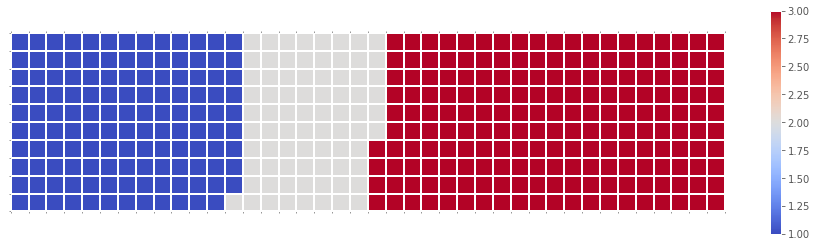

In [22]:
# Instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

#### Step 7
Menambahkan Legend pada waffle chart

<Figure size 432x288 with 0 Axes>

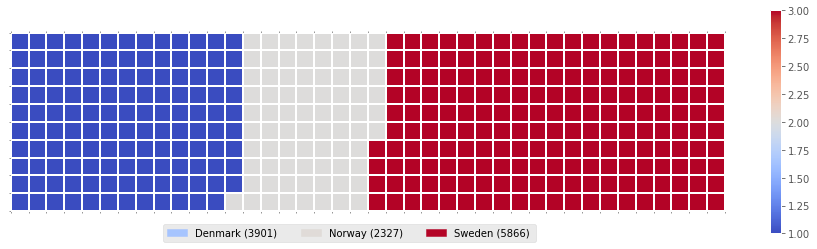

In [24]:
# Instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


# Compute cumulative sum of individual categories to match color schemes between chart & legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# Create legend 
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ') '
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
                                      
                                      
# Add legend to chart
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))

#### Bonus (Function & Merged)
Jika kita harus mengulangi setiap langkah diatas dari 1 - 7 akan membuang buang waktu, mari kita gabungkan dengan function agar efisien yang akan kita sebut ***create_waffle_chart***.

Parameter yang dibutuhkan seperti :
* Categories -> Unique categories or classes in dataframe
* Values -> Values corresponding to categories or classes 
* Height -> Defined height of waffle chart 
* Width -> Defined width of waffle chart
* Colormap -> Colormap class
* Value_sign -> In order to make our function more generalizable. we will add this parameter to address signs that could be associated with a value such as %, $, and so on. Value_sign has a default value of empty string

In [26]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign='') :
    
    # Compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]
    
    total_num_tiles = width * height  # Total number of tiles
    
    # Compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
    
    # Print out
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i] + ': ' + str(tiles))
        
    # Initialize the waffle chart as an empty matriks
    waffle_chart = np.zeros((height, width))
    
    # Define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

             # if the number of tiles populated for the current category is equal to its corresponding allocated tiles....
            if tile_index > sum(tiles_per_category[0:category_index]):
                  # .... proceed to the next category
                category_index += 1

             # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
        
    # Instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])


    # Compute cumulative sum of individual categories to match color schemes between chart & legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # Create legend 
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ') '
        else :
            label_str = category + ' (' +  value_sign + str(values[i]) + ') '
        
        
        color_val = colormap(float(values_cumsum[i]) / total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))


    # Add legend to chart
    plt.legend(handles=legend_handles, loc='lower center', ncol=len(categories), bbox_to_anchor=(0., -0.2, 0.95, .1))

Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

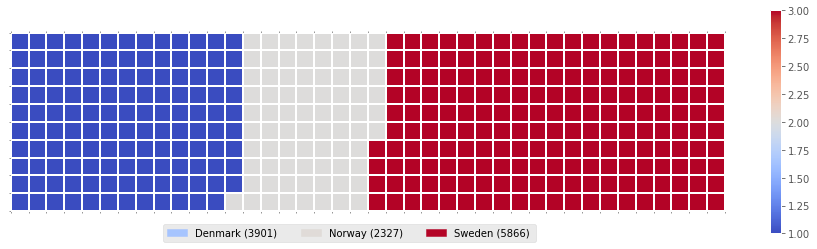

In [27]:
width = 40   # Width for chart
height = 10  # Height for chart

categories = df_dsn.index.values # Categories
values = df_dsn['Total'] # Correponding value of categories

colormap = plt.cm.coolwarm # Color map class


# RUN PROGRAM
create_waffle_chart(categories, values, height, width, colormap)

### Word Clouds
(sering dikenal text cloud atau tag cloud) Bekerja dengan cara yang sederhana yaitu Semakin banyak kata tertentu muncul dalam sumber data tekstual (pidato, posting blog atau database) maka semakin besar dan tebal kata itu muncul di kata cloud.


**Word Clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks**

#### Step 1
Import package wordcloud

In [29]:
from wordcloud import WordCloud, STOPWORDS

#### Step 2
Get the data for example we using novel "*Alice's Adventures in Wonderland*"

In [41]:
alice_novel = open('alice_novel.txt', 'r').read()

#### Step 3
Buat wordcloud object dan generate word cloud lalu memvisualisasikan wordcloud

In [44]:
# set untuk menghapus stopword yang berlebihan
stopwords = set(STOPWORDS)

# Instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white', 
    max_words=2000, 
    stopwords=stopwords
)

# Generate the word cloud
alice_wc.generate(alice_novel)

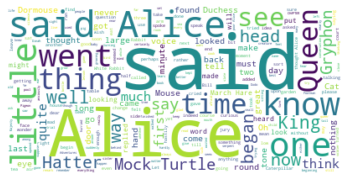

In [46]:
# Visualization word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

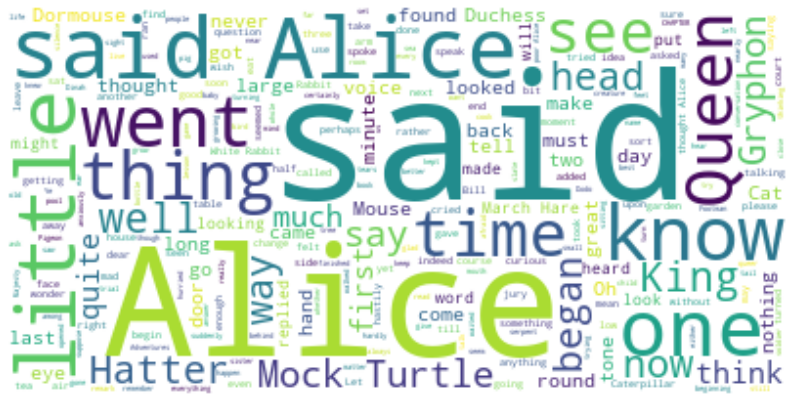

In [47]:
# Zoom it so we can look all the word
fig = plt.figure()
fig.set_figwidth(14) # Set Width
fig.set_figheight(18) # Set Height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

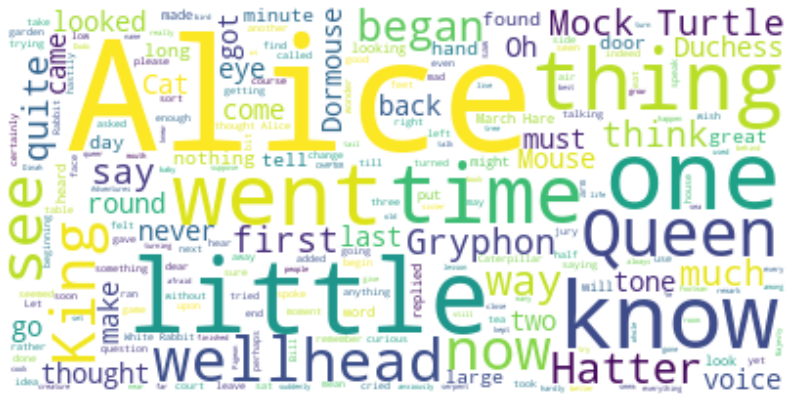

In [48]:
# Let's remove "Said" because is not informatif word
stopwords.add('said')

# Re-generate the word cloud
alice_wc.generate(alice_novel)


fig = plt.figure()
fig.set_figwidth(14) # Set Width
fig.set_figheight(18) # Set Height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Step 4 :
Mengekspor image yang ingin dilapisi dengan kata kata

In [49]:
alice_mask = np.array(Image.open('alice_mask.png'))

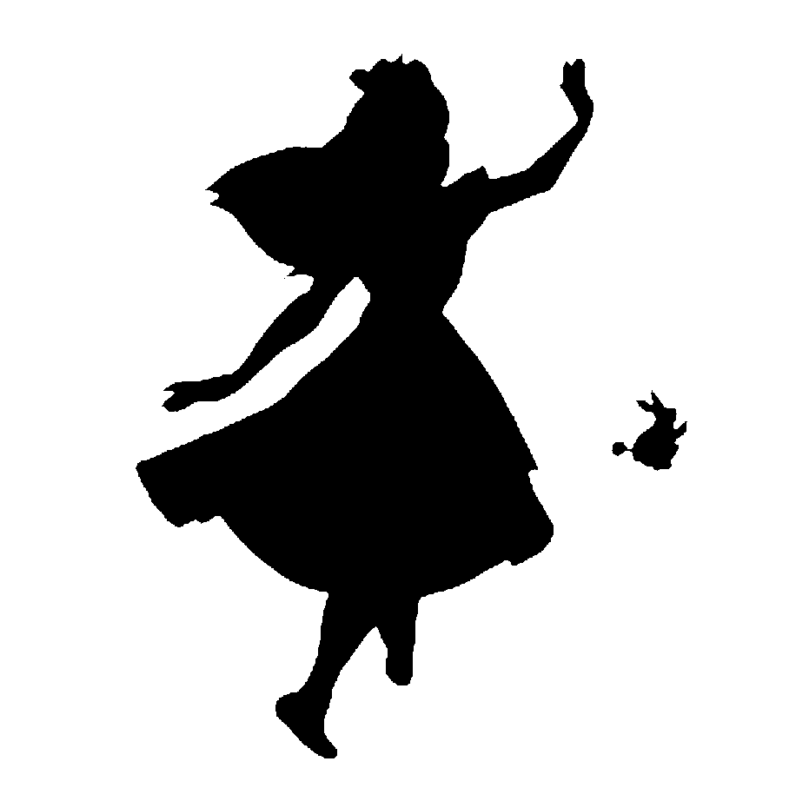

In [50]:
fig = plt.figure()
fig.set_figwidth(14) # Set Width
fig.set_figheight(18) # Set Height

plt.imshow(alice_mask, cmap=plt.cm.gray ,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Step 5
Menggabungkan gambar dengan teks

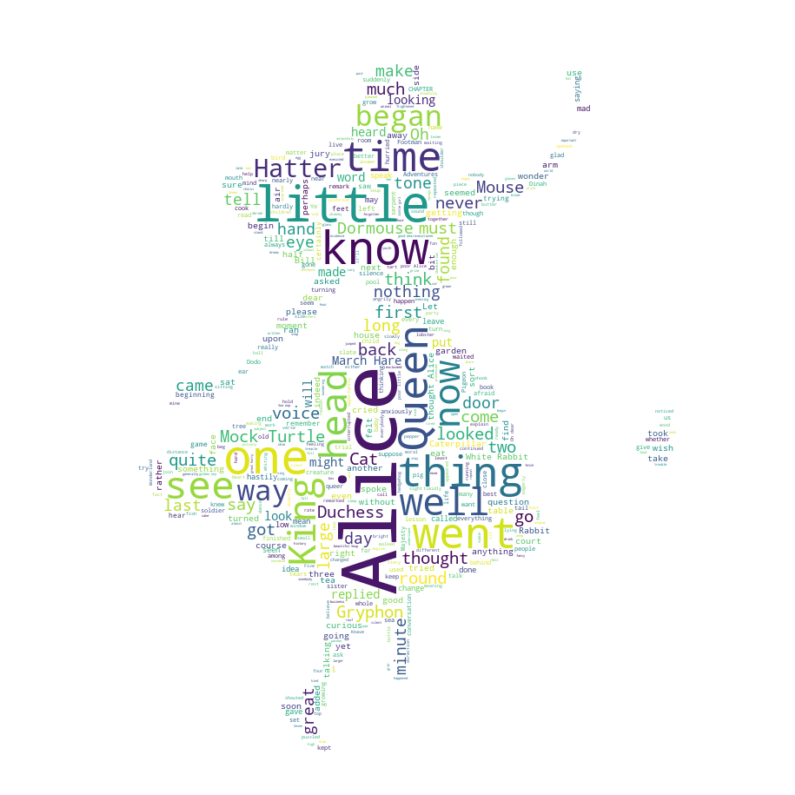

In [54]:
# Instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white', 
    max_words=2000, 
    stopwords=stopwords,
    mask= alice_mask
)

# Generate the word cloud
alice_wc.generate(alice_novel)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # Set Width
fig.set_figheight(18) # Set Height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun. **Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata**

In [55]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [56]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, **Mari kita duplikat nama masing masing negara berdasarkan besar kontribusi mereka terhadap total imigrasi**

In [57]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # Check if country's name is a single word name
    if len(country.split(' '))  == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# Display the generate text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

***Kita tidak berurusan dengan stopwords apapun disini, jadi tidak perlu passing saat membuat kata cloud.***

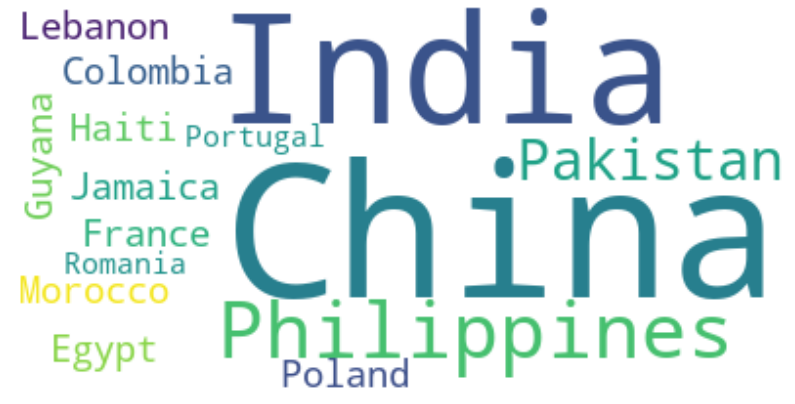

In [59]:
wordcloud = WordCloud(background_color='white').generate(word_string)

# Display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # Set Width
fig.set_figheight(18) # Set Height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Regression plots
Section ini akan menjelajahi tentang *seaborn* dan melihat seberapa efisiennya membuat garus regresi

In [63]:
# !pip install seaborn

import seaborn as sns

Seaborn installed and imported!


In [64]:
# To get total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float
df_tot.index = map(float, df_tot.index)

# Reset the index to put in back in as a column in df_tot
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# Result
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


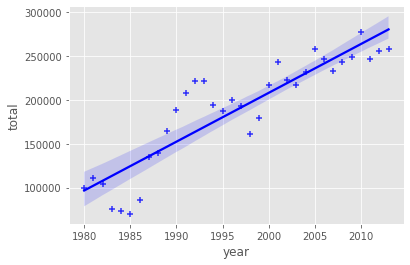

In [69]:
# Plot data
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

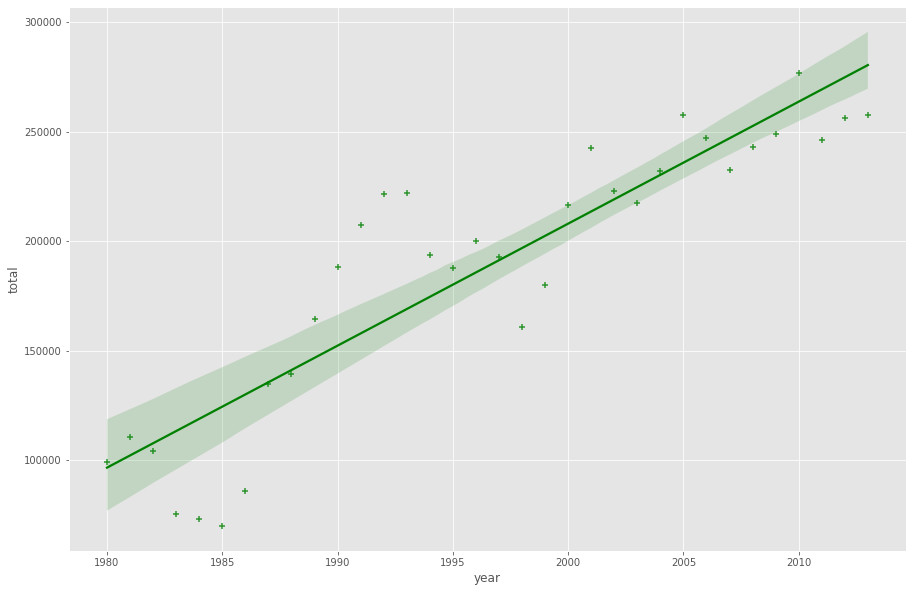

In [70]:
# Zoom out the data
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

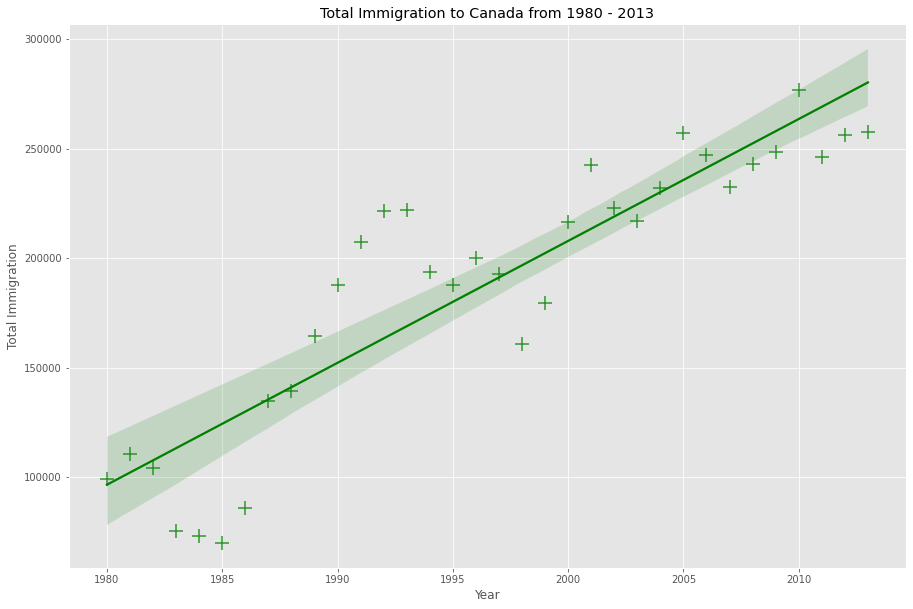

In [73]:
# Size up marker & title for label x and y
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x & y label
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

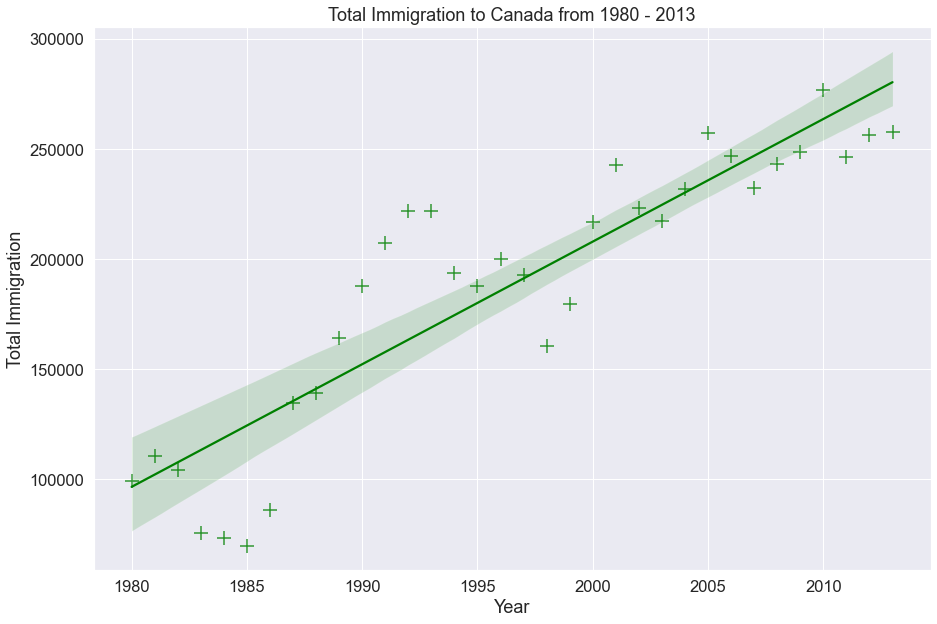

In [74]:
plt.figure(figsize=(15, 10))

# Size up the font for label, x and y
sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x & y label
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

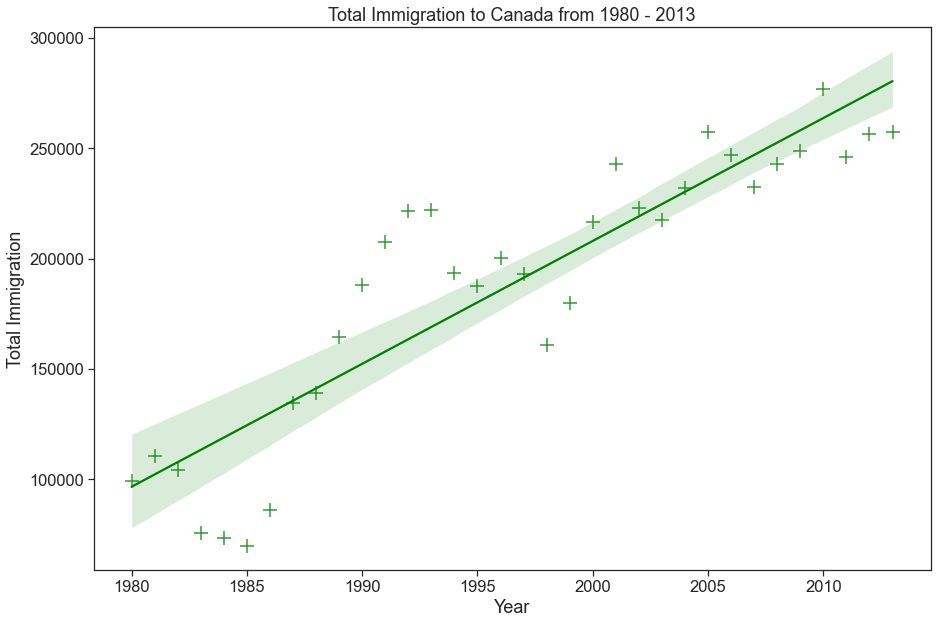

In [75]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

# Change background to white
sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x & y label
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

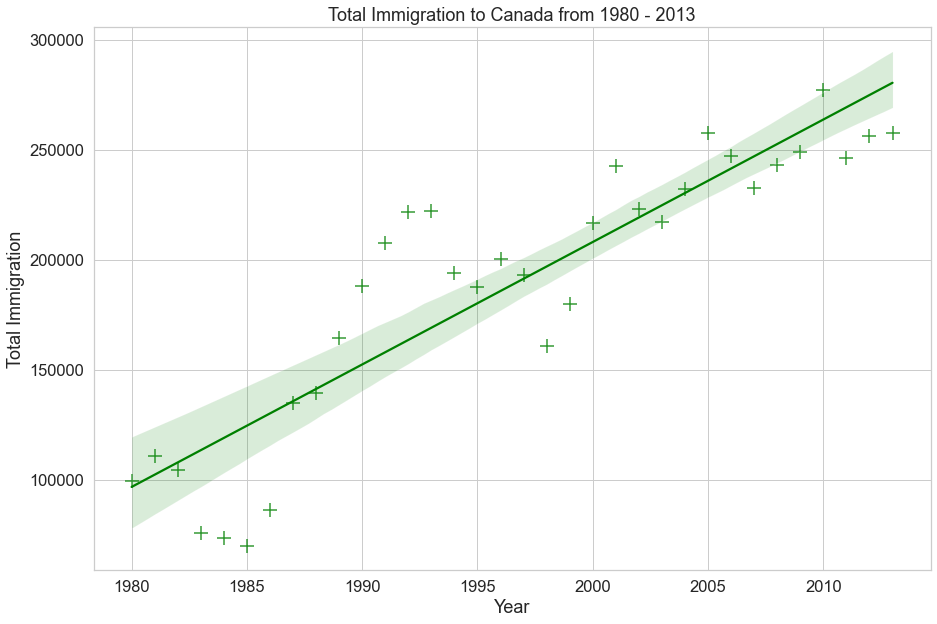

In [76]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

# Change background to white grid
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x & y label
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

#### Summary Regression 
Rangkuman dari seluruh kodingan diatas

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

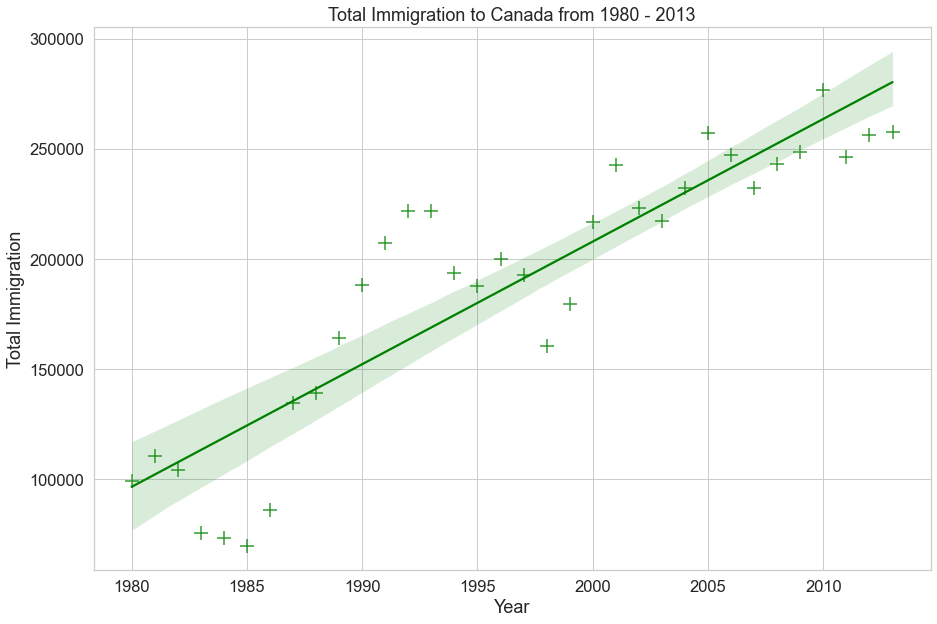

In [77]:
# Create df_countries dataframe Denmark, Norway, Sweden
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Create df_total by sum across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset index
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']

# Change column year from string to int
df_total['year'] = df_total['year'].astype(int)

# Define figure size
plt.figure(figsize=(15, 10))

# Define background stule & font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# Generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x & y label
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title